In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from subprocess import check_output
print(check_output(["ls", "./dataset/"]).decode("utf8"))

Gungor_2018_VictorianAuthorAttribution_readme.txt
test.csv
train.csv



In [2]:
train = pd.read_csv('./dataset/train.csv',encoding="ISO-8859-1", error_bad_lines=False)

In [3]:
train.head(1000)

,text,author
0,ou have time to listen i will give you the ent...,1
1,wish for solitude he was twenty years of age a...,1
2,and the skirt blew in perfect freedom about th...,1
3,of san and the rows of shops opposite impresse...,1
4,an hour s walk was as tiresome as three in a s...,1
...,...,...
995,perhaps her sensations or possibly feeling imp...,2
996,the pretty verse â be to others kind and true ...,2
997,present you to the emperor yet if you merely w...,2
998,river not yet frozen across only with many blo...,2


In [4]:
import nltk
import gensim
import multiprocessing

In [7]:
# Remove all non-letter characters and make everything lowercase.
train['text'] = train['text'].str.replace('[^a-zA-Z]',' ').str.lower()

In [8]:
train['text'].head(100)

0     ou have time to listen i will give you the ent...
1     wish for solitude he was twenty years of age a...
2     and the skirt blew in perfect freedom about th...
3     of san and the rows of shops opposite impresse...
4     an hour s walk was as tiresome as three in a s...
                            ...                        
95    whole question he said i wouldn t listen to th...
96    the most manner n no he stammered i go on the ...
97    the best way was to go home with her at once a...
98    in the end there were several times when could...
99    the telegraph he kept informed of the at new y...
Name: text, Length: 100, dtype: object

In [9]:
# Remove stop words with regex. '\\b' matches any break (space or linebreak or whatever) and '|'
# is an or operator. So, for example '\\ba\\b|\\bis\\b|\\band\\b' will match 'a', 'is' or 'and'.

stop_re = '\\b'+'\\b|\\b'.join(nltk.corpus.stopwords.words('english'))+'\\b'
train['text'] = train['text'].str.replace(stop_re, '')

train['text'].head(100)

0     ou  time  listen   give   entire story  said  ...
1     wish  solitude   twenty years  age    possessi...
2       skirt blew  perfect freedom   upper parts  w...
3      san   rows  shops opposite impressed  upon  v...
4      hour  walk   tiresome  three   sensible engli...
                            ...                        
95    whole question  said    listen   columns  figu...
96      manner n   stammered  go   early train  morr...
97     best way   go home       would  sooner place ...
98      end   several times  could  paid half     wi...
99     telegraph  kept informed    new york   soon  ...
Name: text, Length: 100, dtype: object

In [10]:
# split into words
train['text'] = train['text'].str.split()
test['text'] = test['text'].str.split()

train['text'].head(10)

0    [ou, time, listen, give, entire, story, said, ...
1    [wish, solitude, twenty, years, age, possessio...
2    [skirt, blew, perfect, freedom, upper, parts, ...
3    [san, rows, shops, opposite, impressed, upon, ...
4    [hour, walk, tiresome, three, sensible, englis...
5    [comfortable, seat, last, thing, seen, beautif...
6    [account, health, bad, run, alone, days, docto...
7    [rate, whatever, took, place, mutual, pleasure...
8    [date, information, provision, mr, provision, ...
9    [accept, figures, excited, outburst, fact, exp...
Name: text, dtype: object

In [11]:
# Detect common phrases so that we may treat each one as its own word
phrases = gensim.models.phrases.Phrases(train['text'].tolist())
phraser = gensim.models.phrases.Phraser(phrases)
train_phrased = phraser[train['text'].tolist()]

In [12]:
# Gensim has support for multi-core systems
multiprocessing.cpu_count()

8

In [13]:
#Word2Vec

In [14]:
# I have no reason in mind to change the default word2vec parameters, so I will use the defaults
w2v = gensim.models.word2vec.Word2Vec(sentences=train_phrased,workers=8)

In [15]:
w2v.save('w2v_v1')

In [16]:
#For the input we use the sequence of sentences hard-coded in the script.
from gensim.models import Word2Vec
sentences = train['text'] #data which we have for train.
model = Word2Vec(sentences, min_count=1)

In [17]:
#Now we have model with words embedded 
#We can query model for similar words like below or ask to represent word as vector:

In [18]:
print (model.similarity('time', 'date'))

0.2860683


/Users/malik96/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


In [19]:
print (model.similarity('wish', 'date'))

-0.18536723


/Users/malik96/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


In [20]:
print (model.most_similar(positive=['story'], negative=[], topn=2))

[('tale', 0.8134564161300659), ('stories', 0.748117983341217)]


/Users/malik96/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [21]:
print (model['information'])

[ 1.1737621   0.7621978   1.3858416  -0.76025486 -0.5794962  -1.3018192
 -1.6966985  -1.9489331   0.9422256  -0.95114136 -0.81798595  0.36658254
 -0.9522264  -0.8236547   0.5844416  -2.7581913  -2.426755   -1.2874863
 -2.7688518  -1.9339497   2.5928893   0.14999972  1.3193682  -2.8860002
  1.1293986  -1.8168459   1.7622886   1.3740432   0.0195824   1.4242716
 -0.5663857  -0.15403812 -0.92939174 -0.74308294 -1.9638598   2.1865675
 -0.59358793  2.717513   -1.9704744   2.832944    0.5737407  -0.6432568
  2.029368   -0.9965355   0.39647284  0.8822888  -3.1830423  -2.042383
 -0.279152    1.8638767  -0.8104814  -0.4186439   0.18802348 -1.4395673
  0.3815475  -1.5428861   0.7841511   0.81144094 -2.4757893  -1.7667502
 -0.83327746  0.13496508 -1.3412216   1.984735   -0.30068642 -0.47421214
  1.1415331  -1.8704642  -0.2360961  -1.153947   -0.45863724  0.8378163
  0.03938422 -0.54696035  1.5230044  -1.6890026  -3.616487    0.63029224
 -0.01511667  1.319997    1.0335124   1.1328224   0.52233344 -

/Users/malik96/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [22]:
# If calculating the cosine similarity of two words.
# if the words come together quite often and mostly with each other then similarity of words should be high
# and if two words could be used interchangbly in the same context if the hold hyponym/synonym/opposite similarity will be high

In [23]:
#To get vocabulary or the number of words in vocabulary:
model.wv.vocab

{'ou': <gensim.models.keyedvectors.Vocab at 0x229fa2b90>,
 'time': <gensim.models.keyedvectors.Vocab at 0x229f64d10>,
 'listen': <gensim.models.keyedvectors.Vocab at 0x229fdf590>,
 'give': <gensim.models.keyedvectors.Vocab at 0x2293c2910>,
 'entire': <gensim.models.keyedvectors.Vocab at 0x22a8266d0>,
 'story': <gensim.models.keyedvectors.Vocab at 0x22a826250>,
 'said': <gensim.models.keyedvectors.Vocab at 0x22a826a90>,
 'may': <gensim.models.keyedvectors.Vocab at 0x22a826890>,
 'form': <gensim.models.keyedvectors.Vocab at 0x22a826a10>,
 'basis': <gensim.models.keyedvectors.Vocab at 0x22a8263d0>,
 'future': <gensim.models.keyedvectors.Vocab at 0x21923f050>,
 'novel': <gensim.models.keyedvectors.Vocab at 0x21923f090>,
 'prove': <gensim.models.keyedvectors.Vocab at 0x21923f0d0>,
 'quite': <gensim.models.keyedvectors.Vocab at 0x21923f110>,
 'interesting': <gensim.models.keyedvectors.Vocab at 0x21923f150>,
 'one': <gensim.models.keyedvectors.Vocab at 0x21923f190>,
 'invention': <gensim.mode

In [24]:
#vocabulary or the number of words in vocabulary
print (list(model.wv.vocab))
print (len(list(model.wv.vocab)))

['ou', 'time', 'listen', 'give', 'entire', 'story', 'said', 'may', 'form', 'basis', 'future', 'novel', 'prove', 'quite', 'interesting', 'one', 'invention', 'course', 'anything', 'everything', 'agreeable', 'best', 'place', 'hear', 'tale', 'victoria', 'good', 'box', 'coachman', 'set', 'drive', 'recital', 'half', 'reached', 'house', 'postponed', 'remainder', 'stopped', 'excellent', 'lunch', 'way', 'back', 'friend', 'continued', 'finished', 'indeed', 'suitable', 'use', 'told', 'thanks', 'put', 'shape', 'readers', 'make', 'alterations', 'sake', 'dramatic', 'interest', 'main', 'would', 'follow', 'lines', 'given', 'spoil', 'romance', 'answer', 'page', 'question', 'must', 'uppermost', 'reader', 'mind', 'already', 'revealed', 'almost', 'much', 'plot', 'rest', 'refer', 'without', 'chapters', 'chapter', 'early', 'morning', 'responded', 'call', 'young', 'american', 'rowed', 'leisurely', 'bank', 'gentry', 'belongs', 'easily', 'get', 'excited', 'helped', 'fare', 'grace', 'inherited', 'generations', 

In [25]:
#K Means Clustering with NLTK Library 

In [26]:
#To use word embeddings word2vec in machine learning clustering algorithms we initiate X as below:
X = model[model.wv.vocab]

/Users/malik96/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [28]:
words = list(model.wv.vocab)


In [29]:
#Now we can plug our X data into clustering algorithms.

from nltk.cluster import KMeansClusterer
import nltk

NUM_CLUSTERS=10 #number of our authors
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print (assigned_clusters)

[5, 3, 3, 3, 1, 3, 3, 1, 0, 0, 1, 0, 1, 3, 0, 3, 0, 3, 3, 3, 1, 3, 2, 3, 5, 2, 3, 9, 2, 7, 7, 4, 7, 7, 2, 1, 2, 7, 0, 2, 3, 7, 3, 3, 2, 3, 0, 3, 3, 3, 3, 9, 0, 3, 0, 3, 0, 1, 2, 3, 3, 8, 1, 3, 0, 3, 5, 1, 3, 4, 0, 4, 2, 4, 4, 3, 0, 3, 1, 1, 0, 5, 2, 2, 3, 3, 3, 0, 7, 7, 2, 0, 0, 1, 3, 4, 3, 2, 4, 0, 6, 3, 0, 3, 0, 3, 3, 3, 3, 0, 1, 3, 3, 3, 7, 7, 1, 0, 3, 3, 9, 8, 4, 2, 6, 3, 6, 3, 7, 3, 7, 3, 5, 7, 8, 4, 8, 7, 3, 4, 0, 7, 3, 7, 7, 2, 8, 6, 4, 1, 9, 8, 8, 7, 1, 1, 7, 1, 2, 0, 0, 2, 2, 6, 9, 9, 8, 2, 8, 7, 7, 8, 2, 8, 7, 0, 9, 2, 8, 1, 8, 8, 3, 6, 1, 1, 6, 1, 1, 7, 8, 8, 8, 8, 6, 8, 3, 7, 8, 3, 8, 3, 3, 4, 8, 8, 8, 8, 3, 7, 7, 8, 5, 7, 7, 2, 0, 7, 9, 9, 9, 8, 3, 7, 7, 2, 2, 2, 1, 7, 6, 1, 7, 4, 4, 2, 2, 2, 4, 7, 9, 7, 2, 3, 7, 1, 6, 4, 0, 7, 0, 6, 6, 8, 2, 5, 3, 0, 9, 3, 3, 1, 3, 8, 8, 8, 1, 1, 7, 4, 4, 0, 8, 1, 1, 7, 8, 9, 3, 1, 1, 8, 3, 7, 2, 2, 9, 0, 8, 0, 8, 3, 4, 9, 3, 6, 2, 2, 8, 7, 8, 7, 3, 4, 4, 2, 3, 6, 8, 7, 1, 8, 1, 8, 6, 4, 8, 8, 7, 2, 8, 3, 2, 8, 6, 8, 8, 8, 4, 3, 4, 7, 1, 

In [30]:
#Here we use cosine distance to cluster our data.
#After we got cluster results we can associate each word with the cluster that it got assigned to:

for i, word in enumerate(words):  
    print (word + ":" + str(assigned_clusters[i]))

ou:5
time:3
listen:3
give:3
entire:1
story:3
said:3
may:1
form:0
basis:0
future:1
novel:0
prove:1
quite:3
interesting:0
one:3
invention:0
course:3
anything:3
everything:3
agreeable:1
best:3
place:2
hear:3
tale:5
victoria:2
good:3
box:9
coachman:2
set:7
drive:7
recital:4
half:7
reached:7
house:2
postponed:1
remainder:2
stopped:7
excellent:0
lunch:2
way:3
back:7
friend:3
continued:3
finished:2
indeed:3
suitable:0
use:3
told:3
thanks:3
put:3
shape:9
readers:0
make:3
alterations:0
sake:3
dramatic:0
interest:1
main:2
would:3
follow:3
lines:8
given:1
spoil:3
romance:0
answer:3
page:5
question:1
must:3
uppermost:4
reader:0
mind:4
already:2
revealed:4
almost:4
much:3
plot:0
rest:3
refer:1
without:1
chapters:0
chapter:5
early:2
morning:2
responded:3
call:3
young:3
american:0
rowed:7
leisurely:7
bank:2
gentry:0
belongs:0
easily:1
get:3
excited:4
helped:3
fare:2
grace:4
inherited:0
generations:6
polite:3
ancestors:0
asked:3
italian:0
man:3
hardly:3
knew:3
word:3
language:0
difficulty:1
meaning:3


vital:0
asks:3
avoid:1
unnecessary:1
sudden:4
preceding:2
closely:7
hats:9
bow:7
perceptible:4
comment:1
appearances:1
relied:1
wisely:1
merit:0
observation:1
rebuke:4
thrust:7
wealth:6
eminent:0
household:2
uncommon:0
special:1
keeps:3
gets:3
wife:3
assent:4
charms:0
deference:1
drivers:9
charming:3
succeeding:0
accustomed:4
insisted:3
animal:9
secured:2
fine:9
galloped:7
mount:8
exercise:1
admiring:4
glances:4
sex:0
favorite:0
resort:0
devices:0
foreseen:1
match:3
frown:4
settled:2
beheld:8
affected:4
recognize:1
completely:1
game:3
cunning:6
wrath:6
lest:7
hi:5
provoke:1
scene:4
whirled:7
single:1
mischief:3
rides:8
escape:1
dejected:4
mien:4
presented:2
beard:9
oath:3
sit:3
lasted:4
range:8
mainly:0
con:5
engaging:4
whisper:7
raging:7
excused:1
courteous:4
imagination:4
became:4
certainty:1
silence:4
corridor:8
envied:6
acted:1
sane:6
referring:1
tooth:9
worse:3
us:3
groans:7
loud:7
accepted:1
required:1
vii:5
marry:3
elapsed:2
resident:2
chambers:2
singular:0
ease:4
temporarily:2


unmistakable:4
prosper:6
romantic:0
mixing:0
clinging:7
strangest:4
p:5
continual:4
poetry:0
inability:1
slipped:7
miniature:9
friday:2
sheets:9
tossing:7
bathed:8
sinks:8
patted:7
cheer:3
soothing:4
indefinite:1
faults:6
refreshed:8
waking:4
fain:6
reaction:4
depressed:4
accumulated:0
scrape:9
sha:5
phrase:0
ke:5
withhold:1
shed:8
natures:6
formality:4
principally:0
clothe:6
product:0
materials:0
courageous:5
ahead:7
governed:0
contain:0
vexation:4
repair:2
disadvantage:1
climax:4
alliance:1
indignantly:3
graver:4
based:0
confounded:3
lively:4
grows:8
merrily:7
neighbor:3
wickedness:6
arts:0
serving:2
obligations:1
needles:9
pins:9
siege:2
fortress:2
veritable:8
surpassing:0
sweetness:4
peep:8
group:2
noses:9
hushed:4
scarcely:4
gallantly:9
oo:5
admire:3
mild:4
preacher:0
solemnly:3
unsettled:1
urging:1
io:5
dearly:6
burden:6
methods:0
seal:9
pro:5
ardent:4
delayed:2
proudly:7
jest:3
merchants:2
composition:0
machine:9
exhibited:0
intricate:8
inspection:2
screams:7
manufacture:0
deepe

poisoned:6
illustrations:5
clapping:7
een:5
ted:5
onward:8
voyages:5
animation:4
hinder:1
comb:9
melting:8
incline:1
decorum:1
extending:8
forsaken:6
chained:7
issues:1
dan:3
persuading:1
darted:7
forgetful:4
treacherous:6
deferred:1
friendliness:4
mockery:6
seaman:2
miscellaneous:0
flee:6
unawares:7
hissing:7
grating:7
bough:8
truer:6
pierced:7
characteristic:0
click:7
perils:6
comely:9
precedent:1
patch:8
hind:7
magistrate:2
wrist:7
legged:9
httle:3
loo:5
fir:8
machines:9
lounging:9
imagining:4
betraying:1
wary:3
skeleton:9
revolt:6
misty:8
dreamy:4
plots:8
illustrate:0
diligently:0
severed:6
shrieked:7
interpret:1
hostility:1
peak:8
weeds:8
cavalry:2
swam:7
hive:8
revive:6
humiliating:1
wig:9
boundless:8
struggles:6
trampled:8
invaded:8
aloof:1
applies:0
pat:5
breasts:6
bleeding:7
hath:6
famine:6
bide:5
posterity:0
doom:6
captured:2
hey:5
folk:3
mastery:6
descriptive:0
cambridge:2
heen:1
scope:0
cheated:3
sloping:8
occupations:0
thia:5
stem:7
bud:5
vigilance:1
weighing:9
muddy:8
sod

In [31]:
#This example is based on k means from scikit-learn library.

from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X closest cluster center):")
print (kmeans.score(X))
 
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
 
print ("c")
print (silhouette_score)

Cluster id labels for inputted data
[6 0 5 ... 7 1 3]
Centroids data
[[ 3.09620678e-01 -1.32521749e-01 -5.80788195e-01  4.76293147e-01
  -5.08166254e-01 -7.81717896e-02  1.93546712e-03 -3.84762049e-01
  -1.38509125e-01 -5.99342108e-01 -3.55138123e-01 -8.76143396e-01
   2.39092290e-01 -1.73140198e-01 -4.51479554e-02 -4.80320632e-01
   5.20219132e-02  4.13936749e-02 -2.68297434e-01 -7.34615624e-01
  -3.71062160e-01 -6.65240347e-01  1.02098852e-01  3.05147290e-01
   2.31772304e-01 -7.15643167e-02 -1.43446475e-02  2.73376346e-01
  -3.45114619e-01 -6.92844689e-01 -8.67816389e-01  3.03818792e-01
   4.13840264e-02  6.48180470e-02 -4.92018983e-02  1.05063963e+00
   1.93723142e-01  6.65083289e-01 -1.25925973e-01  2.92249352e-01
   6.87192917e-01 -3.55337054e-01 -9.58141208e-01 -2.92038620e-01
  -3.12937319e-01 -1.99018329e-01 -3.18713874e-01 -7.36900985e-01
   2.28428677e-01  4.11285073e-01 -1.75361469e-01  2.13602036e-02
  -4.07605290e-01 -2.85400689e-01  3.77955317e-01  4.77217674e-01
   2.17

Silhouette_score: 
0.018073147


In [32]:
# Author distribution and plotting a histogram of number of texts per author

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

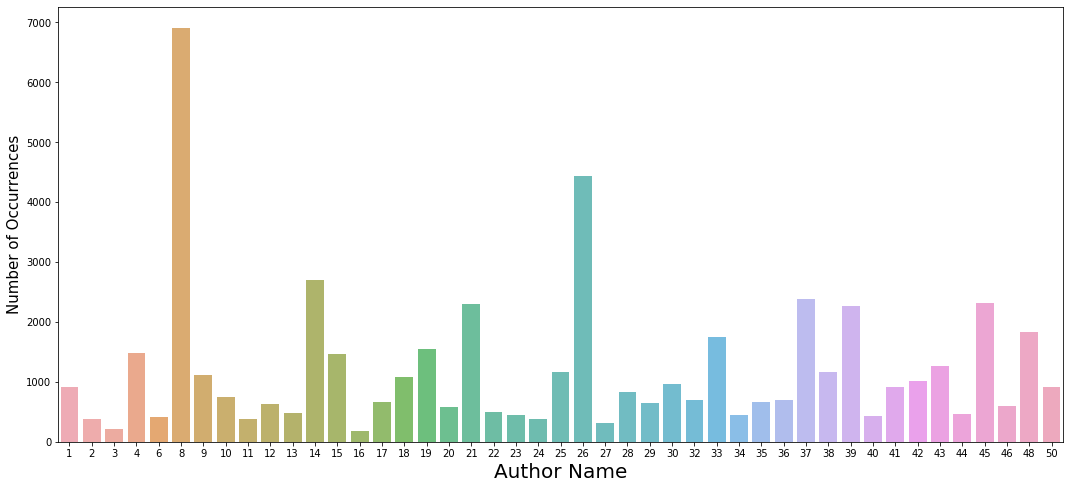

In [39]:
train = pd.read_csv('./dataset/train.csv',encoding="ISO-8859-1", error_bad_lines=False)


cnt_srs = train['author'].value_counts()


plt.figure(figsize=(18,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=15)
plt.xlabel('Author Name', fontsize=20)
plt.show()

In [1]:
#word2vec clustering


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

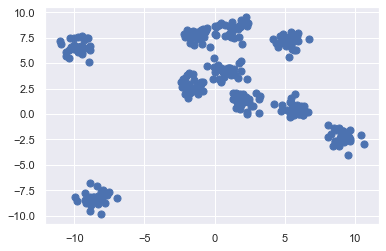

In [2]:
#First, let's generate a two-dimensional dataset containing 10 distinct blobs each represent authors with 5 novels. 
#To emphasize that this is an unsupervised algorithm, we will leave the labels out of the visualization

from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=300, centers=10,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

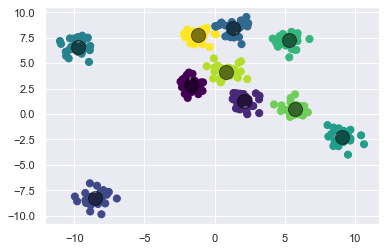

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Text(1.08, 1.08, 'Final prediction')

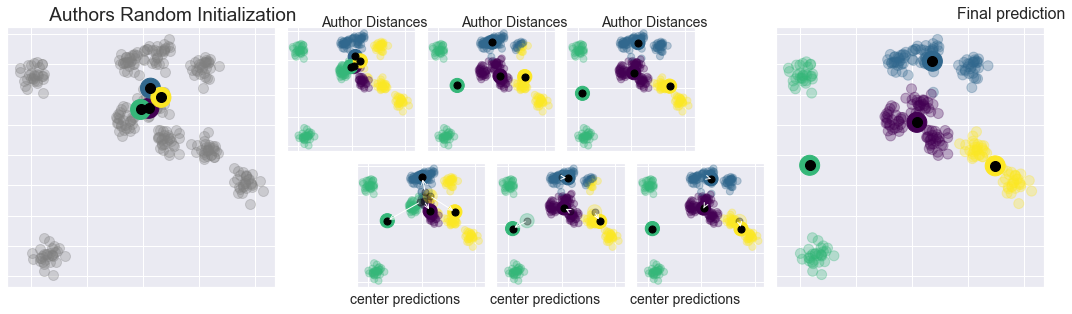

In [76]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import pairwise_distances_argmin

X, y_true = make_blobs(n_samples=300, centers=10,
                       cluster_std=0.60, random_state=0)

rng = np.random.RandomState(42)
centers = [0, 4] + rng.randn(4, 2)

def draw_points(ax, c, factor=1):
    ax.scatter(X[:, 0], X[:, 1], c=c, cmap='viridis',
               s=50 * factor, alpha=0.3)
    
def draw_centers(ax, centers, factor=1, alpha=1.0):
    ax.scatter(centers[:, 0], centers[:, 1],
               c=np.arange(4), cmap='viridis', s=200 * factor,
               alpha=alpha)
    ax.scatter(centers[:, 0], centers[:, 1],
               c='black', s=50 * factor, alpha=alpha)

def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax

#random initialization
fig = plt.figure(figsize=(15, 4))
gs = plt.GridSpec(4, 15, left=0.02, right=0.98, bottom=0.05, top=0.95, wspace=0.2, hspace=0.2)
ax0 = make_ax(fig, gs[:4, :4])
ax0.text(1.08, 1.08, " Authors Random Initialization", transform=ax0.transAxes,
         ha='right', va='top', size=19)
draw_points(ax0, 'gray', factor=2)
draw_centers(ax0, centers, factor=2)

for i in range(3):
    ax1 = make_ax(fig, gs[:2, 4 + 2 * i:6 + 2 * i])
    ax2 = make_ax(fig, gs[2:, 5 + 2 * i:7 + 2 * i])
    
    # Author Distances
    y_pred = pairwise_distances_argmin(X, centers)
    draw_points(ax1, y_pred)
    draw_centers(ax1, centers)
    
    #center point predictions
    new_centers = np.array([X[y_pred == i].mean(0) for i in range(4)])
    draw_points(ax2, y_pred)
    draw_centers(ax2, centers, alpha=0.3)
    draw_centers(ax2, new_centers)
    
    for i in range(4):
        ax2.annotate('', new_centers[i], centers[i],
                     arrowprops=dict(arrowstyle='->', linewidth=1))
        
    
    # Finish iteration
    centers = new_centers
    ax1.text(1.10, 1.10, "Author Distances", transform=ax1.transAxes, ha='right', va='top', size=14)
    ax2.text(-0.05, -0.05, "center predictions", transform=ax2.transAxes, ha='left', va='top', size=14)


# Final Prediction Step.    
y_pred = pairwise_distances_argmin(X, centers)
axf = make_ax(fig, gs[:4, -4:])
draw_points(axf, y_pred, factor=2)
draw_centers(axf, centers, factor=2)
axf.text(1.08, 1.08, "Final prediction", transform=axf.transAxes,
         ha='right', va='top', size=16)



In [1]:
#Clustering documents with tf-idf and K-mean

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd 
import numpy as np
import nltk
import os
import xgboost
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
import seaborn as sns


In [ ]:
traindf = pd.read_csv('./dataset/train.csv',encoding="ISO-8859-1", error_bad_lines=False)
for author_i in traindf.author.unique():
    print(author_i)
    at = traindf[traindf.author == author_i].text.values
    tf = TfidfVectorizer(analyzer='word', ngram_range=(1,3), min_df = 0, stop_words = 'english')
    tfidf_matrix =  tf.fit_transform(at)
    feature_names = tf.get_feature_names() 
    len(feature_names)
    dense = tfidf_matrix.todense()
    episode = dense[0].tolist()[0]
    phrase_scores = [pair for pair in zip(range(0, len(episode)), episode) if pair[1] > 0]
    sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
    for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:20]:
        print('{0: <20} {1}'.format(phrase, score))
        print("\n")

1
rowed                0.08398631405812844


canal                0.07308336161251015


time listen          0.06793864953475896


boat                 0.054238432180660406


effect               0.05217446908453025


craft                0.04752854288973964


city                 0.04728890384180398


row                  0.04506959105600333


passenger            0.04385042653211469


noise                0.04311643845086123


does                 0.04231273264743283


silently             0.040917902472524526


early                0.038693334312835365


stone                0.038458950638788215


corner               0.036865732755332226


lines                0.036330799763288756


love gone            0.0341680312884493


african forest       0.03396932476737948


african forest things 0.03396932476737948


agreeable best       0.03396932476737948


2
mr                   0.11934830210891315


mrs                  0.0770225186593897


sir john             0.07240954297329026


tr

romance              0.08493767627807267


miss                 0.08363719723136483


perfect colored      0.0658046370888708


colored              0.0637032572085545


sea                  0.058054780322916784


window               0.05560976081016136


oldest               0.05467063141404001


men                  0.05450132343106723


perfect              0.05394585022598811


said                 0.05193993564963548


mrs                  0.051914245533431866


heroine              0.04949361359572054


eve                  0.04608359913419895


half                 0.04464501889293864


odd                  0.04197436891605234


merely               0.04150290676019021


said did             0.039809878977933845


look like            0.03905882367751474


don                  0.038572419989325334


years ago            0.03770553526213398


14
gallery              0.0843779939990716


singing              0.06448408343859266


necessity abundant   0.06405609320938603


slate  

iii                  0.21326153057965477


ii                   0.20162998864485374


iv                   0.1718851520087156


lakes                0.12938358709005918


great lakes          0.12159311392820121


st                   0.11180577825401962


ii iii               0.10722105653618531


contents             0.08254594129194259


iii iv               0.08041579240213899


vi                   0.07532893273251513


discovery            0.06400875676340685


fort                 0.06250369163953294


great                0.058651504528871745


fort iii             0.057219032547806394


gone single          0.057219032547806394


gone single ship     0.057219032547806394


ii fort iii          0.057219032547806394


iii iv st            0.057219032547806394


lake iv              0.057219032547806394


page great           0.057219032547806394


24
benches              0.16038971767076665


members              0.13805819022700275


chair                0.13003320519815117


s

standards            0.11534545154418924


preface              0.0823746628250717


judged               0.07997569544490618


nation               0.06619585713891245


age                  0.06432490745974694


trained              0.06337903531425317


judged standards     0.06155748972484779


trained soldier      0.06155748972484779


governor             0.059981771583679636


miracle              0.054916441883381135


century              0.05248994753847172


courage              0.05204771233266282


king                 0.05009387597776491


arc                  0.04938315383145249


xv                   0.047146913977874794


xvii                 0.047146913977874794


character            0.045238715693167175


contents             0.045224286682661714


contrast             0.043623740363676056


xi                   0.043623740363676056


35
messrs               0.13484951478116328


meeting              0.10502765242415121


committee            0.10307194953234193


b

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [2]:
train = pd.read_csv('./dataset/train.csv',encoding="ISO-8859-1", error_bad_lines=False)

In [3]:
train.columns

Index(['text', 'author'], dtype='object')

In [4]:
train.head(10)

,text,author
0,ou have time to listen i will give you the ent...,1
1,wish for solitude he was twenty years of age a...,1
2,and the skirt blew in perfect freedom about th...,1
3,of san and the rows of shops opposite impresse...,1
4,an hour s walk was as tiresome as three in a s...,1
5,on the comfortable seat the last thing had see...,1
6,on account of his health which is very bad he ...,1
7,at any rate whatever took place was for the mu...,1
8,date with the information that there was a pro...,1
9,accept such figures as these not at all excite...,1


In [8]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(train.text.values)
text = tfidf.transform(train.text.values)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


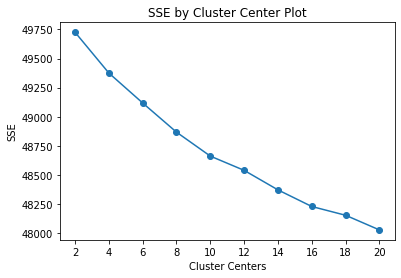

In [9]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 20)

In [10]:
clusters = MiniBatchKMeans(n_clusters=14, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

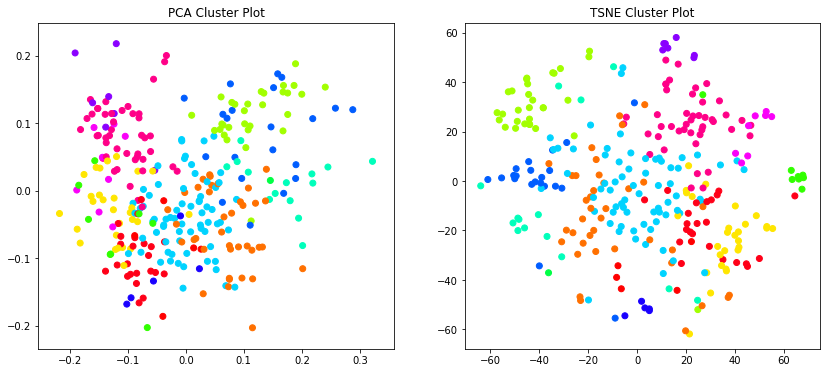

In [11]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

In [12]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)


Cluster 0
dan,know,like,got,said,ain,ll,em,ve,don

Cluster 1
yes,like,say,little,did,man,think,know,don,said

Cluster 2
great,like,river,trees,mountains,miles,boat,feet,sea,water

Cluster 3
sir,anne,park,said,lady,sister,jane,mr,mrs,miss

Cluster 4
art,hast,shall,love,man,god,said,thee,thy,thou

Cluster 5
little,martin,mrs,know,father,pinch,don,mr,said,tom

Cluster 6
did,little,miss,mother,dear,know,don,mr,said,mrs

Cluster 7
face,time,life,eyes,did,like,old,little,man,said

Cluster 8
old,say,little,know,man,miss,mrs,sir,said,mr

Cluster 9
good,sir,says,wi,like,ll,man,said,dick,ye

Cluster 10
iâ,ia,cr,ihe,vo,il,tlie,tbe,ii,lo

Cluster 11
people,history,men,van,war,new,governor,great,peter,king

Cluster 12
work,states,world,mr,nature,great,life,new,man,men

Cluster 13
horse,water,feet,head,came,men,man,said,white,wolf


In [13]:
#THE END !!!